# BITSTAMP BTC/USD market

### OHLCV data Exploratory Analysis

### Packages

In [5]:
# External packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime 


# Internal packages
import sys
sys.path.append('../../Time_Series_Forecasting/TS_helpers/')
sys.path.append('../../Time_Series_Forecasting/')

data_dir = '../../Data/Coins/BTC_USD/bitcoin-historical-data/'
from dates_kaggle1min import make_all_time_indexes, make_integer_time_index

### Load Data and parse Date

In [7]:
# data = pd.read_csv(data_dir + 'bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')
# print(data.shape)
# data.head()

In [8]:
# # get date from unix timestamp
# data['time_exchange'] = data['Timestamp'].apply(lambda x : datetime.datetime.utcfromtimestamp(int(x)))
# # make the time indexes as standard
# data = make_all_time_indexes(data)
# data.head()

In [6]:
# data.to_csv(data_dir + 'bitstampUSD_1-min_data_with_timecols.csv')

##### The process was done once and saved as csv so just load the processed data frame

In [189]:
data = pd.read_csv(data_dir + 'bitstampUSD_1-min_data_with_timecols.csv', index_col='Unnamed: 0')
print(data.shape)
data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(3778817, 20)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_exchange,year,month,day,hour,minute,time_year,time_month,time_day,time_hour,time_minute,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011,12,31,7,52,2011,201112,20111231,2011123107,201112310752,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00,2011,12,31,7,53,2011,201112,20111231,2011123107,201112310753,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00,2011,12,31,7,54,2011,201112,20111231,2011123107,201112310754,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00,2011,12,31,7,55,2011,201112,20111231,2011123107,201112310755,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00,2011,12,31,7,56,2011,201112,20111231,2011123107,201112310756,2011-12-31


### Basics

### Distribution over time cycles

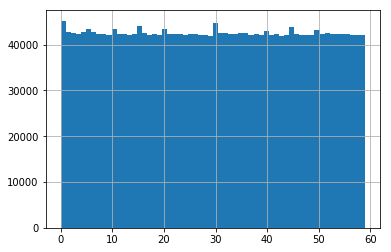

In [68]:
data[data['Close'].notna()]['minute'].hist(bins=60)

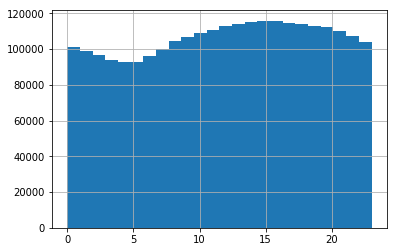

In [84]:
data[data['Close'].notna()]['hour'].hist(bins=24)

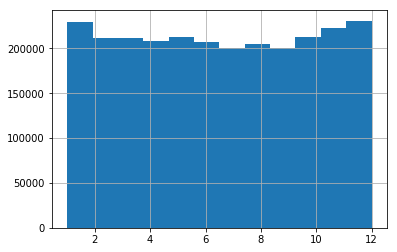

In [152]:
data[data['Close'].notna()]['month'].hist(bins=12 )

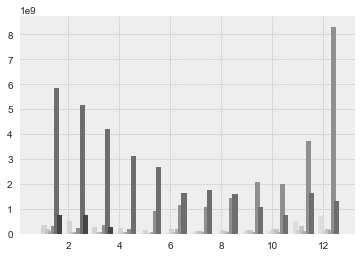

In [267]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

years = data['time_year'].unique()

cmap = cm.get_cmap('Greys', 12*len(years))

with plt.style.context('bmh'):
    plt_no = 0
    for year in years:
        mask = data['time_year'] == year
        plt.bar(data[mask]['month'].unique()-1/3+1/8*plt_no ,
                data[mask].groupby('month')['Volume_(Currency)'].sum(), 
                1/5,
               color=cmap(20+plt_no**2))
        plt_no+=1
    plt.show()

In [268]:
# with plt.style.context('bmh'):
#     plt.bar(data['hour'].unique() ,data.groupby('hour')['Volume_(Currency)'].sum()/data['Volume_(Currency)'].sum(), 1/2)
# #     plt.bar(data['hour'].unique()+1/8 ,data.groupby('hour')['Volume_(BTC)'].sum()/data['Volume_(BTC)'].sum(), 1/5, color='darkblue') 
    
    

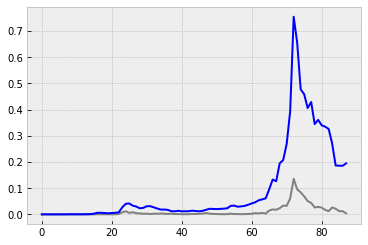

In [115]:

with plt.style.context('bmh'):
    plt.plot(range(data['time_month'].nunique()), 
            data.groupby('time_month')['Volume_(Currency)'].sum()/data['Volume_(Currency)'].sum(),
            color = 'grey')
    plt.plot(range(data['time_month'].nunique()), 
            data.groupby('time_month')['Close'].mean()/data['Close'].max(),
            color = 'blue')
    

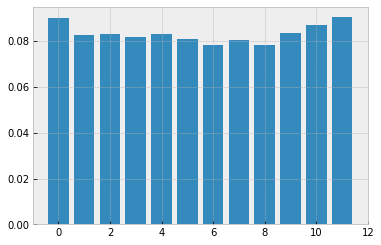

In [150]:
with plt.style.context('bmh'):
    plt.bar(range(data['month'].nunique()), 
            data.groupby('month')['Volume_(Currency)'].count()/data['Volume_(Currency)'].count())
    

## Market Activity

#### NA shares over days / months

In [ ]:
fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index
data1 = volume.values
data2 = (returns.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
# ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(0, 2)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f911d0>,
      dtype=object)

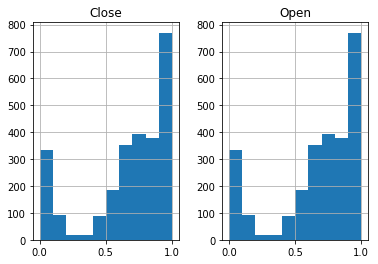

In [10]:
data.groupby('time_day')[['Close', 'Open']].agg(lambda x : sum(pd.notna(x))/len(x) ).hist()

In [2]:
import pandas as pd
df_trade = pd.read_csv('../../Data/Coins/BTC_USD/Trade_Data/BITSTAMP_TRADE_SPOTBTC_cum.csv' , index_col='time_exchange')

In [306]:
import matplotlib.pyplot as plt

m, k=2000, 2300
volume= data.groupby('date')['Volume_(BTC)'].sum()[m+1:k+1]
count= data.groupby('date')['Volume_(BTC)'].mean()[m+1:k+1]
# daily_mean_volume
price=data.groupby('date')['Weighted_Price'].mean()[m+1:k+1]
log_returns =((data.groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean().shift()).dropna().apply(np.log)[m+1:k+1]
returns_keep_and_hold =((data.groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean()[0]).apply(np.log)[m:k]
daily_close_price = data[data['Close'].notna()].groupby('date')['Close'].agg(lambda x: list(x)[-1])[m+1:k+1]



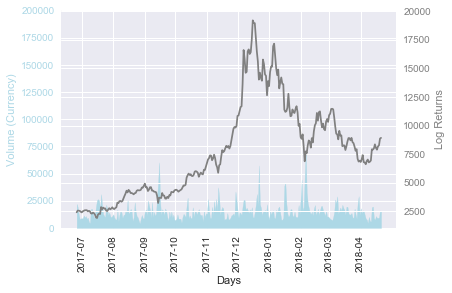

In [309]:
fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index
data1 = volume.values
data2 = (daily_close_price.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
ax1.set_ylim(0, 200000)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey') 
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(-0.5, 0.5)



plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

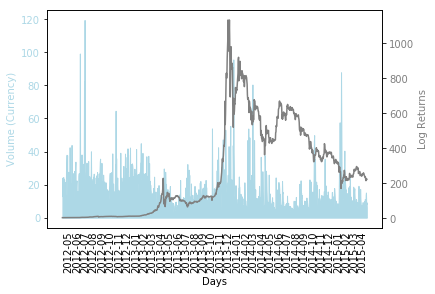

In [47]:
fig, ax1 = plt.subplots()

# Create some mock data
t = count.index
data1 = count.values
data2 = (daily_close_price.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
# ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(0, 2)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [270]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

In [ ]:
tsplot()

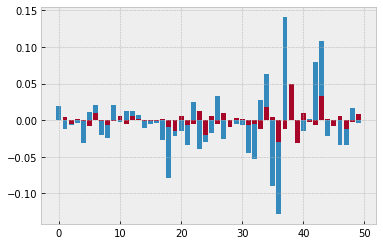

In [127]:
with plt.style.context('bmh'):
    plt.bar(range(50), lrets[750:2000][:50])
    plt.bar(range(50), best_mdl.predict()[:50])

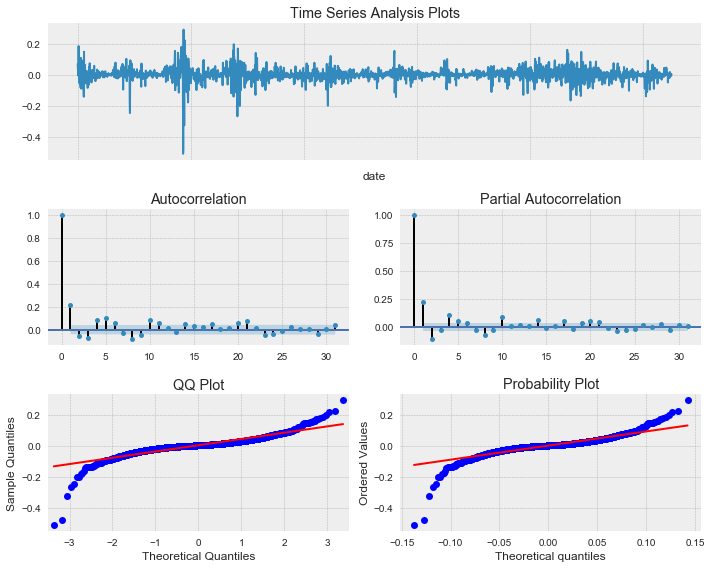

In [320]:

daily_close = data[data['Close'].notna()].groupby('date')['Close'].mean()

daily_returns = (daily_close / daily_close.shift()).apply(np.log)

tsplot(daily_returns[1:], 31)


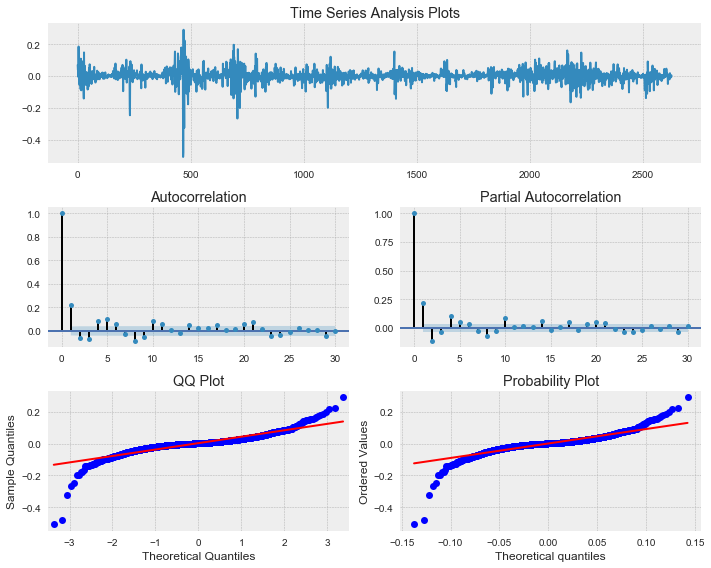

In [321]:

np.random.seed(1)
n_samples = int(1000)
a = 0
x = ((data.groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean().shift()).dropna().apply(np.log).values
    
_ = tsplot(x, lags=30)


In [26]:
mask = data['Close'].notna()
lrets = ((data[].groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean().shift()).dropna().apply(np.log).values

In [31]:
# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(lrets[:20000],
                      order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: %6.2f | order: %s'%(best_aic, best_order))

aic: -9604.91 | order: (4, 3)


<BarContainer object of 50 artists>

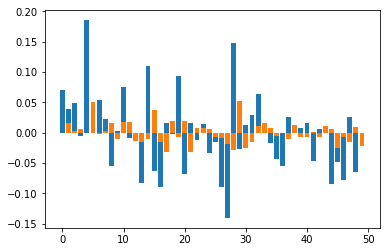

In [50]:
steps = 50

plt.bar(list(range(len(lrets[:steps]))), lrets[:steps])
plt.bar(list(range(len(lrets[:steps]))), best_mdl.predict()[:steps])
# best_mdl.predict()

In [48]:
best_mdl.params

array([ 0.28717279,  0.04680372, -0.60382837,  0.24217719, -0.05001554,
       -0.14736548,  0.53564295])

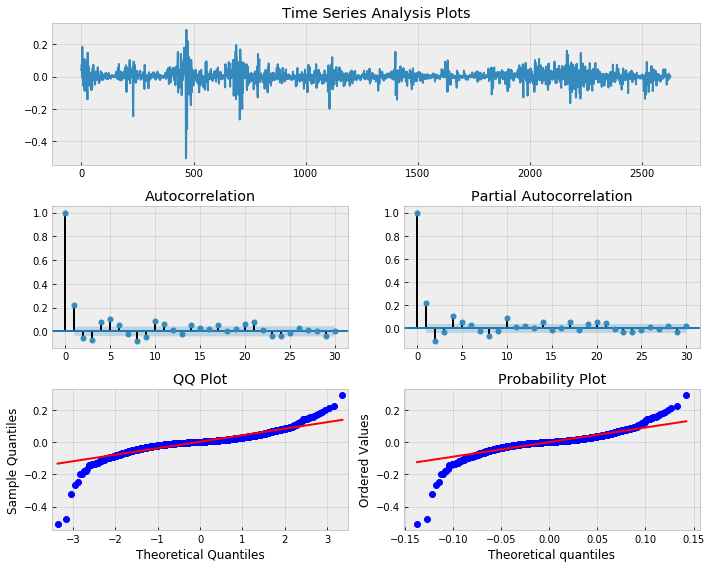

In [32]:
_ = tsplot(lrets[:20000], lags=30)

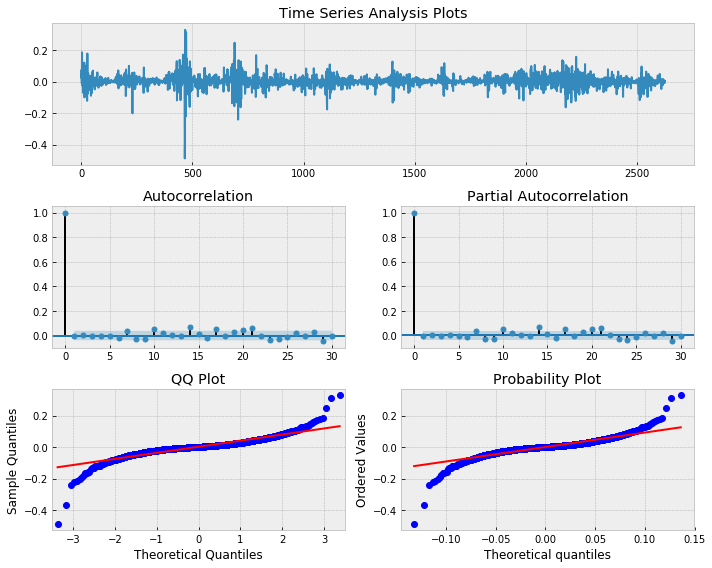

In [34]:
_ = tsplot(best_mdl.resid, lags=30)
# from statsmodels.stats.stattools import jarque_bera

# score, pvalue, _, _ = jarque_bera(mdl.resid)

# if pvalue < 0.10:
#     print(The residuals may not be normally distributed.')
# else:
#     print 'The residuals seem normally distributed.'

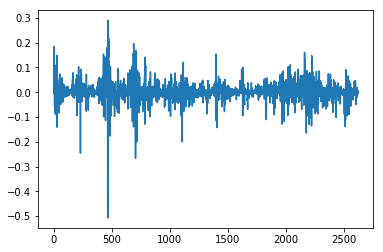

In [58]:
plt.plot(lrets)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: -7281.18 | order: (3, 0, 4)


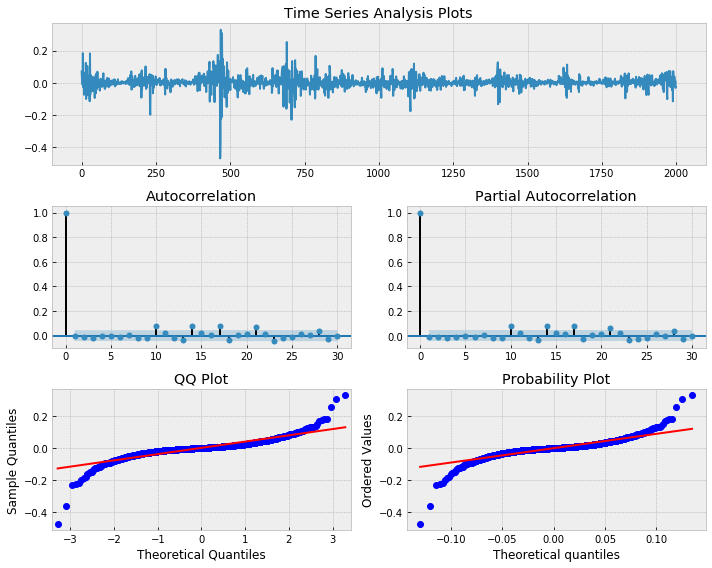

In [56]:
# Fit ARIMA(p, d, q) model to SPX log returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(lrets[:2000], 
                          order=(i,d,j)).fit(method='mle',
                          trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

In [57]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

(array([48.40104464]), array([0.00037361]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

aic: -6481.23 | order: (3, 0, 4)


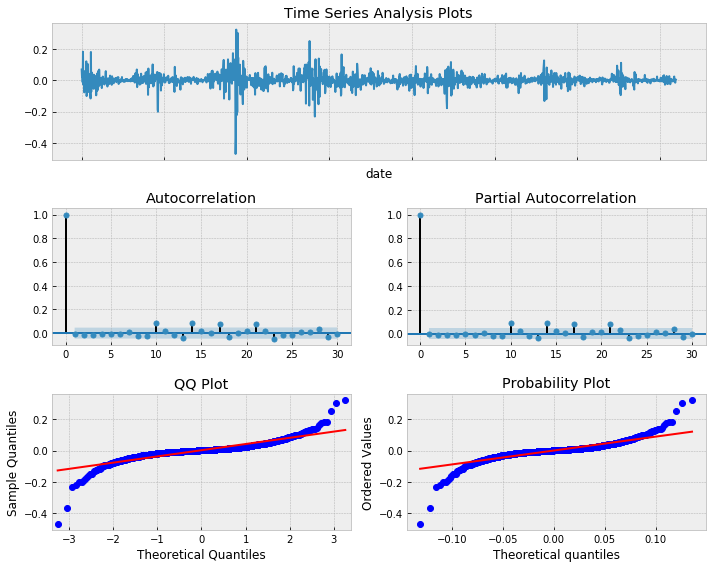

In [60]:
# Fit ARIMA(p, d, q) model to SPX log returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(log_returns[:1800], 
                          order=(i,d,j)).fit(method='mle',
                          trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

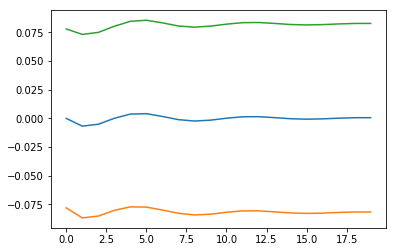

In [74]:
plt.plot(best_mdl.predi(20)[0])
plt.plot(best_mdl.forecast(20)[2])

In [60]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

(array([15.0968989]), array([0.77083643]))

<BarContainer object of 120 artists>

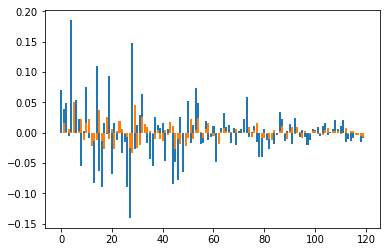

In [76]:
start=0
steps=120
plt.bar(range(steps), log_returns[start:start+steps])
plt.bar(range(steps), best_mdl.predict(0)[start:start+steps])

In [ ]:
k=2
with plt.style.context('bmh'):
    plt.plot(log_returns[1800:1800+k])
#     plt.plot(best_mdl.predict()[:k])
    plt.plot(prediction[:k])

In [118]:
np.mean(np.abs((lrets[750:2000]-best_mdl.predict())))

0.017730370104581162

In [117]:
np.mean(np.abs((lrets[750:2000]-lrets[749:1999])))

0.0226152403361995

In [108]:
[a[0] for a in best_mdl.forecast(100)]

[-0.00024891230120047125,
 0.02719091943902366,
 array([-0.05354214,  0.05304431])]

In [11]:
len(log_returns)

2626

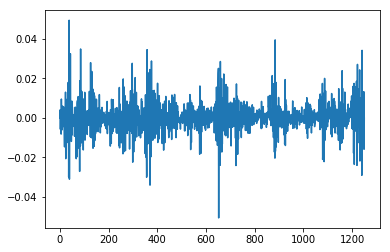

In [95]:
plt.plot(best_mdl.predict(0, 1250))

In [52]:
esn = pyESN.ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 100,
          spectral_radius = 1,
          random_state=42)

train error: 
0.034783063408677865
test error: 
0.037625046997802496


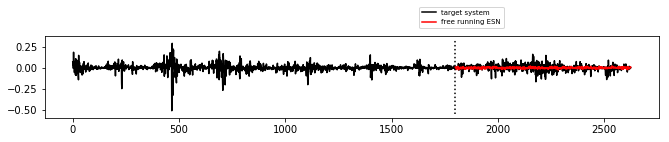

In [53]:
trainlen = 1800
future = len(log_returns.values) - trainlen


pred_training = esn.fit(np.ones(trainlen),log_returns.values[:trainlen])
print("train error: \n"+str(np.sqrt(np.mean((pred_training.flatten() - log_returns.values[:trainlen])**2))))

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - log_returns.values[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),log_returns.values[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

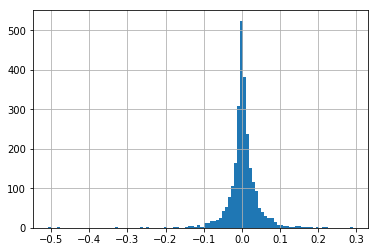

In [23]:
log_returns.hist(bins=100)